# BREAST TISSUE CLASSIFICATION 

# Import libraries 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
)

# Load data 

In [2]:
df = pd.read_csv("/kaggle/input/breast-tissue-impedance-measurements/data.csv")
df.head()

,Class,I0,PA500,HFS,DA,Area,A.DA,Max.IP,DR,P
0,car,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
1,car,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
2,car,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449
3,car,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
4,car,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503


# Data Analysis 

In [3]:
df.isnull().sum()

Class     0
I0        0
PA500     0
HFS       0
DA        0
Area      0
A.DA      0
Max.IP    0
DR        0
P         0
dtype: int64

In [4]:
df.dtypes

Class      object
I0        float64
PA500     float64
HFS       float64
DA        float64
Area      float64
A.DA      float64
Max.IP    float64
DR        float64
P         float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   106 non-null    object 
 1   I0      106 non-null    float64
 2   PA500   106 non-null    float64
 3   HFS     106 non-null    float64
 4   DA      106 non-null    float64
 5   Area    106 non-null    float64
 6   A.DA    106 non-null    float64
 7   Max.IP  106 non-null    float64
 8   DR      106 non-null    float64
 9   P       106 non-null    float64
dtypes: float64(9), object(1)
memory usage: 8.4+ KB


In [6]:
df.describe()

,I0,PA500,HFS,DA,Area,A.DA,Max.IP,DR,P
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,784.251618,0.120133,0.114691,190.568642,7335.155162,23.473784,75.381258,166.710575,810.638127
std,753.950075,0.068596,0.101347,190.801448,18580.314213,23.354672,81.345838,181.309580,763.019135
min,103.000000,0.012392,-0.066323,19.647670,70.426239,1.595742,7.968783,-9.257696,124.978561
25%,250.000000,0.067413,0.043982,53.845470,409.647141,8.180321,26.893773,41.781258,270.215238
50%,384.936489,0.105418,0.086568,120.777303,2219.581163,16.133657,44.216040,97.832557,454.108153
75%,1487.989626,0.169602,0.166504,255.334809,7615.204968,30.953294,83.671755,232.990070,1301.559438
max,2800.000000,0.358316,0.467748,1063.441427,174480.476218,164.071543,436.099640,977.552367,2896.582483


In [7]:
df.columns

Index(['Class', 'I0', 'PA500', 'HFS', 'DA', 'Area', 'A.DA', 'Max.IP', 'DR',
       'P'],
      dtype='object')

In [8]:
df["Class"].value_counts()

Class
adi    22
car    21
mas    18
gla    16
fad    15
con    14
Name: count, dtype: int64

# Data Preprocessing and Splitting 

**LABEL ENCODING**

In [9]:
# Initialize label encoder
le = LabelEncoder()

# Fit and transform the 'class' column
df['class_encoded'] = le.fit_transform(df['Class'])

# Check mapping and result
print("Class mapping:", dict(zip(le.classes_, le.transform(le.classes_))))
print(df)

Class mapping: {'adi': 0, 'car': 1, 'con': 2, 'fad': 3, 'gla': 4, 'mas': 5}
    Class           I0     PA500       HFS           DA           Area  \
0     car   524.794072  0.187448  0.032114   228.800228    6843.598481   
1     car   330.000000  0.226893  0.265290   121.154201    3163.239472   
2     car   551.879287  0.232478  0.063530   264.804935   11888.391827   
3     car   380.000000  0.240855  0.286234   137.640111    5402.171180   
4     car   362.831266  0.200713  0.244346   124.912559    3290.462446   
..    ...          ...       ...       ...          ...            ...   
101   adi  2000.000000  0.106989  0.105418   520.222649   40087.920984   
102   adi  2600.000000  0.200538  0.208043  1063.441427  174480.476218   
103   adi  1600.000000  0.071908 -0.066323   436.943603   12655.342135   
104   adi  2300.000000  0.045029  0.136834   185.446044    5086.292497   
105   adi  2600.000000  0.069988  0.048869   745.474369   39845.773698   

           A.DA      Max.IP        

In [10]:
df.head()

,Class,I0,PA500,HFS,DA,Area,A.DA,Max.IP,DR,P,class_encoded
0,car,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334,1
1,car,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776,1
2,car,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449,1
3,car,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814,1
4,car,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503,1


In [11]:
df= df.drop("Class",axis = 1)

In [12]:
df.head()

,I0,PA500,HFS,DA,Area,A.DA,Max.IP,DR,P,class_encoded
0,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334,1
1,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776,1
2,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449,1
3,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814,1
4,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503,1


In [13]:
X = df.drop("class_encoded",axis=1)
y= df["class_encoded"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,        # 20% test data
    random_state=42,      # For reproducibility
    stratify=y            # Optional: ensures balanced class distribution in both sets
)

# Check sizes
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (84, 9)
Test set size: (22, 9)


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(
    n_estimators=300,          # More trees = better performance (up to a point)
    max_depth=20,              # Limit depth to avoid overfitting
    min_samples_split=5,       # Minimum samples to split a node
    min_samples_leaf=2,        # Minimum samples in a leaf node
    max_features='sqrt',       # Try 'sqrt', 'log2', or None
    bootstrap=True,            # Use bootstrapped samples
    random_state=42,
    class_weight='balanced'    # Helps if data is imbalanced
)

# Train the model
rf_classifier.fit(X_train_scaled, y_train)

# Predict
y_pred = rf_classifier.predict(X_test_scaled)
y_prob = rf_classifier.predict_proba(X_test_scaled)


# Evaluation


**BASIC METRICS**

In [17]:
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test_bin, y_prob, average='macro', multi_class='ovr')

print("✅ Accuracy       :", round(accuracy, 4))
print("🎯 Precision      :", round(precision, 4))
print("📈 Recall         :", round(recall, 4))
print("📊 F1 Score       :", round(f1, 4))
print("📉 ROC-AUC Score  :", round(roc_auc, 4))

✅ Accuracy       : 0.6818
🎯 Precision      : 0.5861
📈 Recall         : 0.6889
📊 F1 Score       : 0.6307
📉 ROC-AUC Score  : 0.9353


**CONFUSION MATRIX**

/tmp/ipykernel_13/1747149567.py:7: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


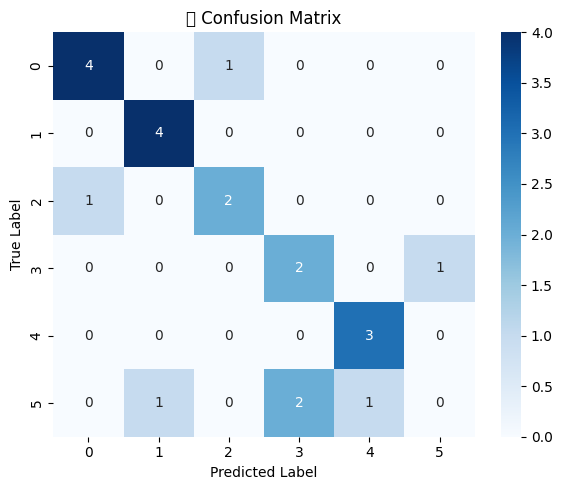

In [18]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("🧪 Confusion Matrix")
plt.tight_layout()
plt.show()

**CLASSIFICATION REPORT**

In [19]:
print("\n📋 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=[str(c) for c in classes]))


📋 Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.80      1.00      0.89         4
           2       0.67      0.67      0.67         3
           3       0.50      0.67      0.57         3
           4       0.75      1.00      0.86         3
           5       0.00      0.00      0.00         4

    accuracy                           0.68        22
   macro avg       0.59      0.69      0.63        22
weighted avg       0.59      0.68      0.63        22



**ROC CURVE**

/tmp/ipykernel_13/2405499489.py:15: UserWarning: Glyph 128678 (\N{VERTICAL TRAFFIC LIGHT}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128678 (\N{VERTICAL TRAFFIC LIGHT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


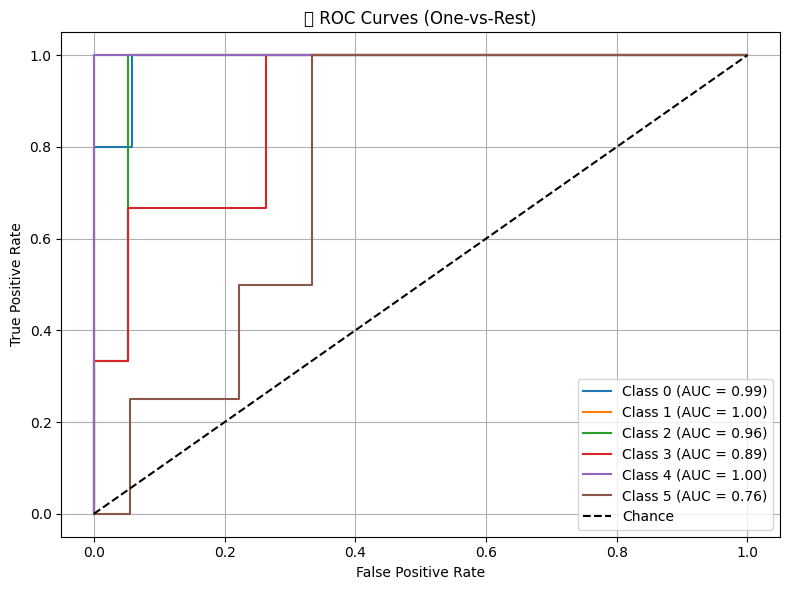

In [20]:
fpr = dict()
tpr = dict()

plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(fpr[i], tpr[i], label=f"Class {class_label} (AUC = {roc_auc_score(y_test_bin[:, i], y_prob[:, i]):.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("🚦 ROC Curves (One-vs-Rest)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()